### CoSMo dataset analysis
***
This notebook contains an analysis performed on data from the CoSMo dataset.

In [1]:
# Analyzing the frequency of each class in our dataset
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

path = "../build/dataset/**/*.png"

counter_cheater = 0
counter_legit = 0

for file in glob(path, recursive=True):
    if re.search("(1)", file):
        counter_cheater += 1

    else:
        counter_legit += 1

print(counter_cheater)
print(counter_legit)

f:\ProgramData\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
f:\ProgramData\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
f:\ProgramData\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


19777
2285


Text(0.5, 1.0, 'Frequency of each class')

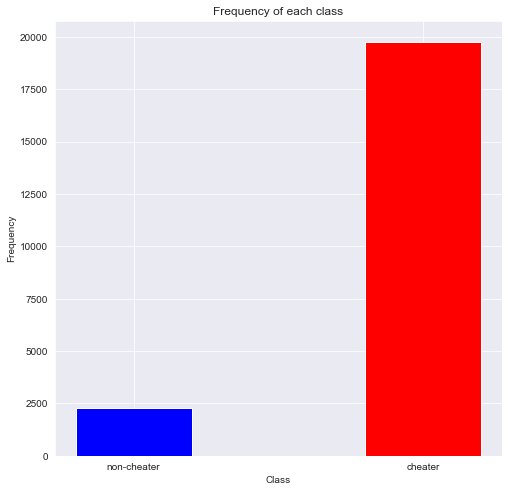

In [3]:
plt.figure(figsize=(8, 8))
sns.set_style("darkgrid")

x = ["non-cheater", "cheater"]
y = [counter_legit, counter_cheater]

plt.bar(x, y, 0.4, color=["blue", "red"])

plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Frequency of each class")

In [4]:
import cv2
import os

video_path = "../build/dataset/cosmo_dataset/*.mp4"
durations = []
files = []

for file in glob(video_path):
    head, tail = os.path.split(file)
    video = cv2.VideoCapture(file)
    fps = video.get(cv2.CAP_PROP_FPS)
    frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    duration = (frame_count/fps)/60

    durations.append(duration)
    files.append(tail)

print(durations)

[4.52, 11.623888888888889, 7.927371816260705, 11.491491491491493, 2.0122222222222224, 6.8590744444444445, 5.286666666666666, 33.32718277777778, 9.366666666666667, 19.190301412523635, 7.853957222222222, 19.872094316538764, 48.88166666666667, 1.4177625925925925, 5.52774537037037, 5.715000000000001, 9.422222222222222, 3.76, 3.381111111111111, 6.737289074074074, 4.333333333333333, 10.327541296296296, 6.215, 5.442777777777778, 11.207863418974531, 25.41316555555556, 10.697777777777778, 7.76331111111111, 24.83316649983317, 4.602375555555556, 10.670555555555556, 4.602375555555556, 15.397777777777778, 13.21]


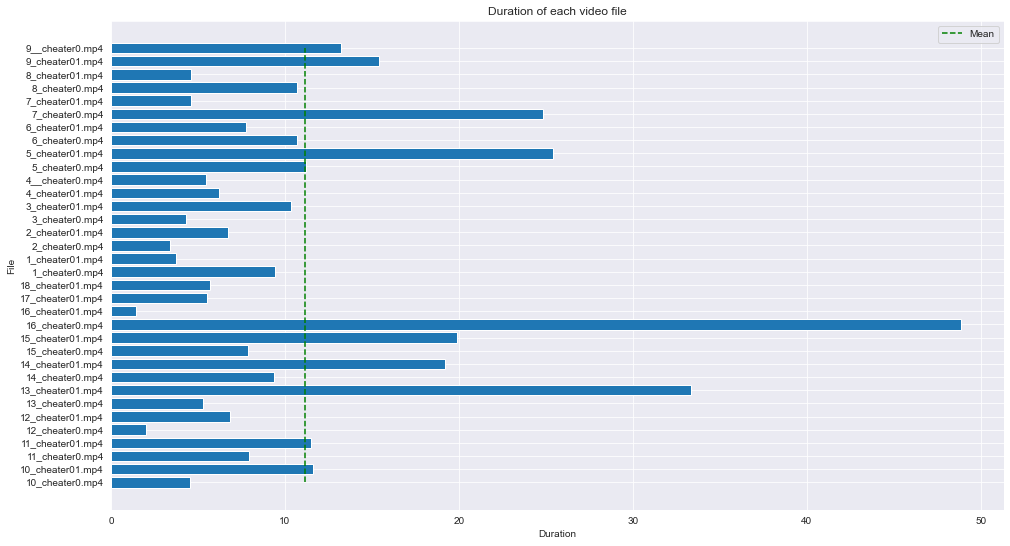

In [4]:
import numpy as np

plt.rcParams["figure.figsize"] = [16,9]

fig, ax = plt.subplots()

duration_mean = [np.mean(durations)] * len(files)

line = ax.plot(duration_mean, files, label="Mean", color='g', linestyle="--")
bar = ax.barh(files, durations)

ax.set_xlabel("Duration")
ax.set_ylabel("File")
ax.set_title("Duration of each video file")
ax.legend(loc='upper right')

In [5]:
import random

frame_path = "../build/dataset/train/cheater/"
filename = random.choice(os.listdir(frame_path))

image = cv2.imread(frame_path + filename)

cv2.imshow("random image", image)
cv2.waitKey(0)

27

In [21]:
video_path = "../build/dataset/cosmo_dataset/*.mp4"
durations = []
durations_cheater = []
durations_legit = []
files = []

for file in glob(video_path):
    head, tail = os.path.split(file)
    video = cv2.VideoCapture(file)
    fps = video.get(cv2.CAP_PROP_FPS)
    frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    duration = (frame_count/fps)/60
    durations.append(duration)

    if re.search("(1)", file):
        durations_cheater.append(duration)
    
    else:
        durations_legit.append(duration)

    files.append(tail)

In [14]:
import numpy as np
from scipy.stats import ttest_1samp

durations_cheater = np.array(durations_cheater)
mu = np.mean(np.array(durations_legit))

ttest, pvalue = ttest_1samp(durations_cheater, mu)

one_tailed_p_value = pvalue/2

print(f"p-value is: {one_tailed_p_value}")

if one_tailed_p_value < 0.05:
    print("Null hypothesis is rejected")

else:
    print("Null hypothesis is accepted")

p-value is: 0.33885664500978163
Null hypothesis is accepted


In [26]:
classes = [1 if re.search("(1)", file) else 0 for file in files]

videos_df = pd.DataFrame({"file": file, "class": classes, "duration": durations})

print(videos_df.corr())

             class  duration
class     1.000000  0.038596
duration  0.038596  1.000000
